In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# First approach to reading files in a folder

path = "D:\Lessons\PythonProjects\Sales_Data"

filepath = os.path.join(path, "sales*.csv")

# display the file path
print(filepath)

# return list of file names that match the pattern in filepath
filelist = glob.glob(filepath)

# display the list of files found in filepath
print(filelist)

# concate the output of each pd.read_csv on each file in the filelist
all_months_data = pd.concat(map(pd.read_csv, filelist), ignore_index=True)

# save to csv
all_months_data.to_csv("all_data.csv", index=False)

all_months_data.head()

D:\Lessons\PythonProjects\Sales_Data\sales*.csv
['D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_April_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_August_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_December_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_February_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_January_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_July_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_June_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_March_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_May_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_November_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_October_2019.csv', 'D:\\Lessons\\PythonProjects\\Sales_Data\\Sales_September_2019.csv']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
# read concatenated file from disk

all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Start data cleansing**

In [4]:
# Get summary information about the data

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
# find all nans in the 'all_data' dataframe

# nan_df = all_data[all_data.isna().any(axis='columns')]

nan_df = all_data[all_data.isnull().any(axis='columns')]

nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
nan_df.shape

(545, 6)

In [7]:
# drop all nan found in the all_data dataframe

all_data.dropna(how='all', inplace=True)

In [8]:
# Confirm no more nan in the data

all_data[all_data.isnull().any(axis='columns')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
all_data.shape

(186305, 6)

In [10]:
%%script False
#%%script echo skipping

# Error!!!
# When 'Order Date' is converted to Date, it gives error due to invalid date 

# Convert the 'Order date' column to date
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

Couldn't find program: 'False'


Get the length of valid date in the 'Order Date' column and use it to filter invalid date

In [11]:
# Create 'Order Date Length' column by getting the length of the value of 
# 'Order Date'column

all_data['Order Date Length'] = all_data['Order Date'].apply(len)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date Length
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",14
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",14
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",14


In [12]:
# Invalid data with invalid "Order Date" less than 14

mask1 = all_data["Order Date Length"] < 14
nan_df2 = all_data[mask1]
nan_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date Length
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,10
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,10
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,10
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,10
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,10


In [13]:
nan_df2.shape

(355, 7)

In [14]:
# Valid data with valid date ('Order Date') greater than or equal to 14

mask2 = all_data["Order Date Length"] >= 14
all_data = all_data[mask2]
all_data.shape

(185950, 7)

In [15]:
# delete the 'Order Date Length' column since it is no longer needed

# all_data.drop(columns=['Order Date Length'], inplace=True)

# or

del(all_data['Order Date Length'])

In [16]:
print(all_data.shape)
all_data.head()

(185950, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### What was the best month for sales? How much was earned that month?

In [17]:
# To answer this question, Extract the month number as integer from 'Order date'

all_data['MonthNos'] = all_data['Order Date'].str[:2]   #.astype(int)
# all_data.head(2)

In [18]:
# Convert columns to right data types

# Convert 'Order ID' to integer
# all_data['Order ID'] = all_data['Order ID'].astype('int')

# Convert 'Quantity Ordered' to integer
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')

# Convert 'Price Each' to float
all_data['Price Each'] = all_data['Price Each'].astype('float')

# Convert 'Order Date' to date
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   MonthNos          185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(4)
memory usage: 10.6+ MB


In [19]:
all_data['MonthName'] = all_data['Order Date'].dt.month_name().str[:3]  # more efficient
# all_data['MonthName'] = all_data['Order Date'].dt.strftime('%b')
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNos,MonthName
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Apr
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Apr


In [20]:
# Calculate the Sales amount

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
print(all_data['Sales'].dtype)
all_data.head(2)

float64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNos,MonthName,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Apr,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Apr,99.99


Best Month Sales

In [21]:
# %%script echo skipping

BestMonthSales = all_data.pivot_table(values='Sales', index='MonthName',  aggfunc=np.sum)

# Sorting values in descend order. This turns BestMonthSales from dataframe to series
BestMonthSales = BestMonthSales['Sales'].sort_values(ascending=False) 
print(type(BestMonthSales))

# format pandas number display to float with thousands separator
pd.options.display.float_format = '{:,.2f}'.format

BestMonthSales

<class 'pandas.core.series.Series'>


MonthName
Dec   4,613,443.34
Oct   3,736,726.88
Apr   3,390,670.24
Nov   3,199,603.20
May   3,152,606.75
Mar   2,807,100.38
Jul   2,647,775.76
Jun   2,577,802.26
Aug   2,244,467.88
Feb   2,202,022.42
Sep   2,097,560.13
Jan   1,822,256.73
Name: Sales, dtype: float64

In [22]:
# Actual best month sales value and month

# is BestMonthSales[0] bcos it was sorted  descending or it is BestMonthSales.max() 
bestsales = BestMonthSales[0] 
bestmonth = BestMonthSales.index[0]
"Best Sale month is: {} and the amount is {:,.2f}".format(bestmonth, bestsales)

'Best Sale month is: Dec and the amount is 4,613,443.34'

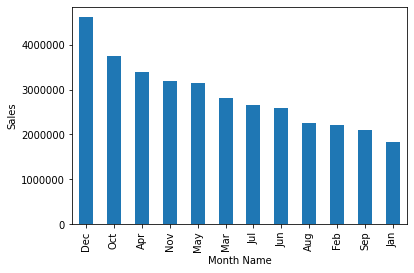

In [23]:
ax = BestMonthSales.plot(kind='bar', x=BestMonthSales.index, y=BestMonthSales)
# or ax = BestMonthSales.plot(kind='bar')

ax.set_xlabel("Month Name")
ax.set_ylabel("Sales")

ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))

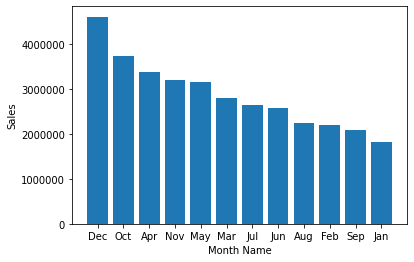

In [24]:
fig, ax = plt.subplots(figsize=(6,4))

x = BestMonthSales.index
y = BestMonthSales

ax.bar(x,y)

ax.set(xlabel="Month Name", ylabel="Sales")

ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.0f"))

# plt.show()

#### What city had the highest number of sales?

In [25]:
# Method 1: Extract City, State from Address

def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

# City is not unique across state. So, for uniqueness, concatenate city and state
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNos,MonthName,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Apr,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Apr,99.99,Boston (MA)


In [26]:
# Method 2: Extract City, State from Address


city = all_data['Purchase Address'].str.split(',', expand=True)[1]  #index 1 is the non-unique city name
state_zip = all_data['Purchase Address'].str.split(',', expand=True)[2]  # index 2 is state + xip
state = state_zip.str.split(' ', expand=True)[1]  # split by space and pick index 1

# City is not unique across state. So, for uniqueness, concatenate city and state
all_data['City'] = city + ' (' + state + ')'

all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNos,MonthName,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Apr,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Apr,99.99,Boston (MA)


In [27]:
citysales = all_data.groupby(all_data['City']).sum()

citysales

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,"2,779,908.20","2,795,498.58"
Austin (TX),11153,"1,809,873.61","1,819,581.75"
Boston (MA),22528,"3,637,409.77","3,661,642.01"
Dallas (TX),16730,"2,752,627.82","2,767,975.40"
Los Angeles (CA),33289,"5,421,435.23","5,452,570.80"
New York City (NY),27932,"4,635,370.83","4,664,317.43"
Portland (ME),2750,"447,189.25","449,758.27"
Portland (OR),11303,"1,860,558.22","1,870,732.34"
San Francisco (CA),50239,"8,211,461.74","8,262,203.91"


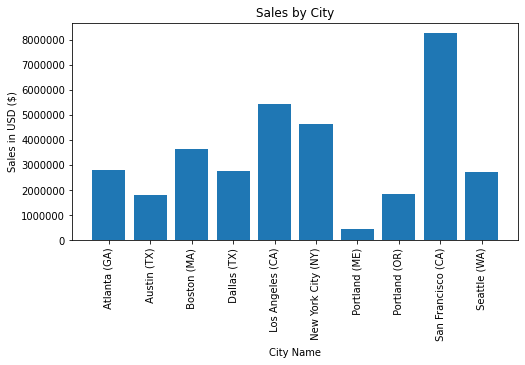

In [28]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(citysales.index, citysales['Sales'])
ax.set_xlabel('City Name')
ax.set_ylabel('Sales in USD ($)')
plt.xticks(rotation=90) #fontsize = 10
plt.title('Sales by City')
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.0f"))

#### What time should we display advertisements to maximize the likelihood of customer's buying product?

In [29]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNos,MonthName,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Apr,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Apr,99.99,Boston (MA),22,30


In [30]:
dfhour = all_data.groupby('Hour').count()

dfhour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNos,MonthName,Sales,City,Minute
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


Text(0.5, 1.0, 'Number of Orders by Hour')

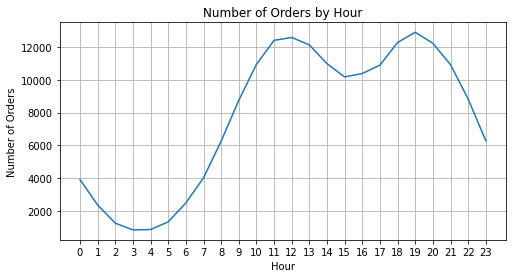

In [31]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(dfhour.index, dfhour['Sales'])
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Orders')
ax.set_xticks(dfhour.index)

plt.grid()
plt.title('Number of Orders by Hour')

#### What products are most often sold together?

In [32]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNos,MonthName,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Apr,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Apr,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,Apr,600.00,Los Angeles (CA),19,42


In [33]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head(6)

<ipython-input-33-7e41ced35da0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNos,MonthName,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Apr,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Apr,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,Apr,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,Apr,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,Apr,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,Apr,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [34]:
# drop duplicates rows of columns 'Order ID' and 'Grouped' in df and assigns to df2

df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [35]:
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [36]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

In [37]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [38]:
# Alternative solution

qOrdered = all_data.groupby('Product')[['Quantity Ordered']].sum()

qOrdered

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


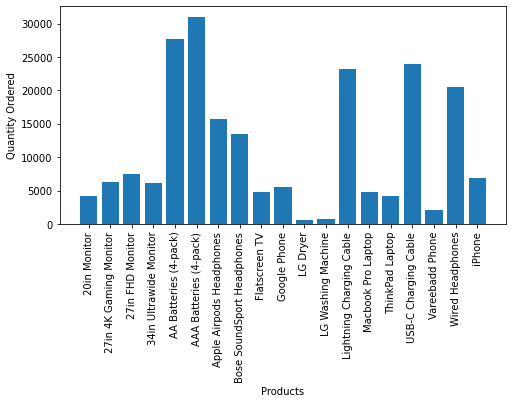

In [39]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(quantity_ordered.index, quantity_ordered)

plt.xticks(quantity_ordered.index, rotation='vertical', fontsize=10)

# OR

# tickvalues = range(len(quantity_ordered.index))
# plt.xticks(tickvalues, rotation='vertical', fontsize=10)

# OR

# ax.set_xticks(tickvalues)
# ax.tick_params(axis='x', labelrotation = 90, size=10)

ax.set_xlabel("Products")
ax.set_ylabel('Quantity Ordered')
plt.show()

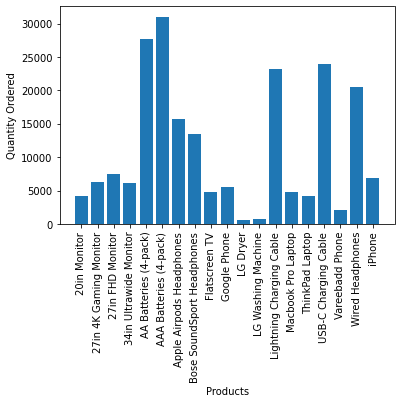

In [40]:
# plt.figure(figsize=(6,4))
# quantity_ordered.plot(kind='bar')
# tickvalues = range(len(quantity_ordered.index))
plt.bar(quantity_ordered.index, quantity_ordered)
plt.xticks(quantity_ordered.index, rotation=90, size=10)
plt.xlabel("Products")
plt.ylabel('Quantity Ordered')
plt.show()

In [41]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop           1,700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

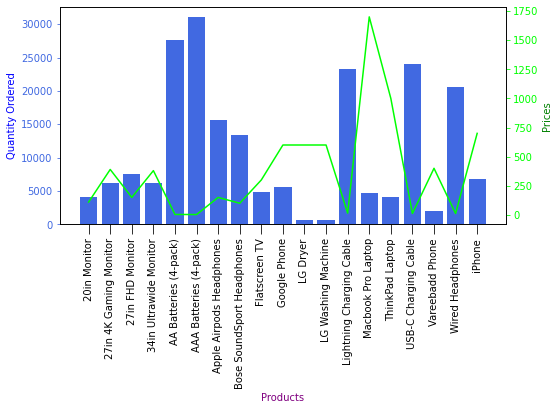

In [42]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()

# ax1 settings
ax1.bar(quantity_ordered.index, quantity_ordered, color='royalblue')
ax1_tickvalues = range(len(quantity_ordered.index))
ax1.set_xticks(ax1_tickvalues)
ax1.tick_params(axis='x', labelrotation = 90, size=10)
ax1.tick_params(axis='y',colors='royalblue')
ax1.set_xlabel("Products", color='Purple')
ax1.set_ylabel('Quantity Ordered', color='b')

# ax2 settings
ax2.plot(prices.index, prices, color='lime')
ax2.set_ylabel('Prices', color='g')
ax2.tick_params(axis='y', colors='lime')

plt.show()

From the chart above, product with low mean price tends to be ordered more compared to those with high price